# Natural Language Processing Project

Welcome to the NLP Project for this section of the course. In this NLP project you will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. This will be a simpler procedure than the lecture, since we will utilize the pipeline methods for more complex tasks.

We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

Let's get started! Just follow the directions below!

In [1]:
# Import libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
# read the file  

yelp = pd.read_csv('yelp.csv')

# see result 

yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [7]:
# simple statisitic

yelp.describe().round(2)

,stars,cool,useful,funny
count,10000.00,10000.00,10000.00,10000.00
mean,3.78,0.88,1.41,0.70
std,1.21,2.07,2.34,1.91
min,1.00,0.00,0.00,0.00
25%,3.00,0.00,0.00,0.00
50%,4.00,0.00,1.00,0.00
75%,5.00,1.00,2.00,1.00
max,5.00,77.00,76.00,57.00


In [8]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [19]:
yelp['text_length'] = yelp['text'].apply(len)

In [20]:
yelp.head(10)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1,2094
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,0,1,0,274
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,0,0,0,349
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0,186


# Exploratory data analysis

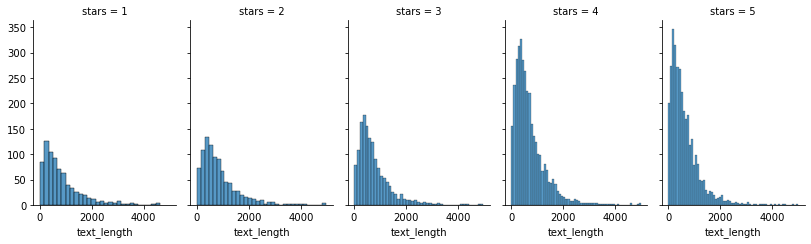

In [21]:
# display histogram between text length and number of stars

g = sns.FacetGrid(yelp, col="stars", height=3.5, aspect=.65)
g.map(sns.histplot, "text_length")

<AxesSubplot:xlabel='stars', ylabel='text_length'>

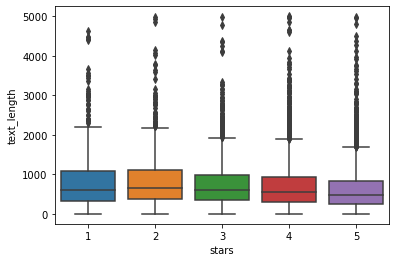

In [22]:
# display boxplot 

sns.boxplot(x="stars", y="text_length", data=yelp)

<AxesSubplot:xlabel='stars', ylabel='count'>

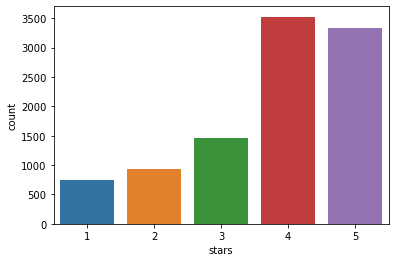

In [23]:
# use countplot to display number of reviews and stars

sns.countplot(x="stars", data=yelp)

In [30]:
stars = yelp.groupby('stars').mean()

stars

,cool,useful,funny,text_length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [33]:
# see are there correlation

corr = yelp.corr(method = 'pearson')

corr

,stars,cool,useful,funny,text_length
stars,1.000000,0.052555,-0.023479,-0.061306,-0.114674
cool,0.052555,1.000000,0.887102,0.764342,0.241451
useful,-0.023479,0.887102,1.000000,0.723406,0.293975
funny,-0.061306,0.764342,0.723406,1.000000,0.251760
text_length,-0.114674,0.241451,0.293975,0.251760,1.000000


<AxesSubplot:>

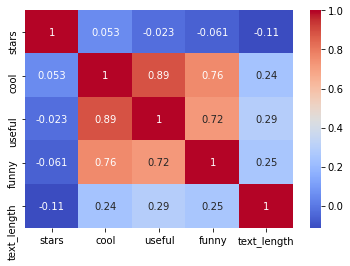

In [40]:
# use heatmap to display correlation 

sns.heatmap(corr, cmap = 'coolwarm', annot = True)

# seems cool and useful category have strong correlation 

# NLP Classification Task

In [47]:
# create the dataframe with review star 1 and  5

yelp_class = yelp[(yelp['stars'] == 1) | (yelp['stars'] ==5)]  

In [49]:
yelp_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   type         4086 non-null   object
 6   user_id      4086 non-null   object
 7   cool         4086 non-null   int64 
 8   useful       4086 non-null   int64 
 9   funny        4086 non-null   int64 
 10  text_length  4086 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


In [50]:
# put in X variable text and y variable stars

X = yelp_class['text']
y = yelp_class['stars']

In [51]:
# import Count vectorizer 

from sklearn.feature_extraction.text import CountVectorizer

In [52]:
# instance

cv = CountVectorizer()

In [53]:
# fit X variable 


X = cv.fit_transform(X)


# Train test Split

In [54]:
# import library for train test split

from sklearn.model_selection import train_test_split

In [55]:
# split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

# Train the model

In [57]:
from sklearn.naive_bayes import MultinomialNB

# create instance

nb = MultinomialNB()

In [59]:
# fit nb into the training data 

nb.fit(X_train, y_train)

MultinomialNB()

In [60]:
# Use the predict method off of nb to predict labels from X_test 

predictions = nb.predict(X_test)

# Evaluation

In [63]:
# get the classification report and confusion matrix

from sklearn.metrics import classification_report, confusion_matrix

In [64]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[ 168   79]
 [  29 1073]]


              precision    recall  f1-score   support

           1       0.85      0.68      0.76       247
           5       0.93      0.97      0.95      1102

    accuracy                           0.92      1349
   macro avg       0.89      0.83      0.85      1349
weighted avg       0.92      0.92      0.92      1349



The result shows not too bad. About 90% accuracy precision and recall between 1 star and 5 star class based on text data. Now let's try with TF-IDF to see what happen. 

# TF-IDF

In [66]:
# get TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer

# get pipeline

from sklearn.pipeline import Pipeline


In [68]:
# create the pipeline to do Countvectorizer, Tfidf_transformer and MultinomialNB

pipe = Pipeline([('bow', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('model', MultinomialNB())])

# Train test split

In [69]:
X = yelp_class['text']
y = yelp_class['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [70]:
# fit the model 

pipe.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model', MultinomialNB())])

In [73]:
# predict 
predictions = pipe.predict(X_test)

In [74]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[   0  247]
 [   0 1102]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       247
           5       0.82      1.00      0.90      1102

    accuracy                           0.82      1349
   macro avg       0.41      0.50      0.45      1349
weighted avg       0.67      0.82      0.73      1349



/Users/yuyakondo/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yuyakondo/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yuyakondo/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
